<a href="https://colab.research.google.com/github/otluiz/Covid-19_kaggle/blob/master/Covid_19_Kaggle_Textos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import zipfile
import pandas as pd
import glob
import json
import seaborn as sns
import spacy
import nltk
from IPython.core.display import HTML
from matplotlib import pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip install -U spacy
!pip install scispacy
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.5/en_core_sci_md-0.2.5.tar.gz
import en_core_sci_md
!python -m spacy download en
import scispacy
import zipfile

Chama os drives da Google e monta um novo diretório neste 'notebook'. Precisa de uma conexão (URL) onde a Google gera uma 'auth' para entrar no meu Google Drive

First, you'll need to mount your Drive.

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Conecta ao diretório do meu Google Drive onde estão os dados da Covid-19 que está compactado.
Será descompactado (unzip) no meu Google Drive


In [8]:
path = '/content/gdrive/My Drive/CORD-19-research-challenge.zip'
from zipfile import *
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

Criação do DataFrame com os textos dos artigos


DataFrame no formato JSON

In [9]:
features_corona = {'paper_id': [],
                   'title' : [],
                   'abstract' : [],
                   'text' : []}

Testando o tipo "features_corona"


In [52]:
type (features_corona)

dict

Transformar o tipo dict em dataframe


In [11]:
corona_df = pd.DataFrame.from_dict(features_corona)

Verificando o novo tipo

In [12]:
type (corona_df)

pandas.core.frame.DataFrame

Pandas é o "default for Machine Learning in Python projects"


In [13]:
corona_df.head()

,paper_id,title,abstract,text


Ler os arquivos JSON a partir da raiz '/' para popular o futuro dataframe (corona_df) a ser criado mais adiante


In [ ]:
json_filenames = glob.glob(f'{"./"}//**/*.json', recursive = True)
print(json_filenames)

In [15]:
len(json_filenames)

29316

Cada arquivo JSON seráá uma linha do dataframe, populando assim o corona_df


In [16]:
def retorna_corona_df(json_filenames, df):
  for file_name in json_filenames:
    linha_dados = {'paper_id': None, 'title': None, 'abstract': None, 'text': None}

    with open(file_name) as json_data:
      if file_name == './sample_data/anscombe.json': # ignora os anscombe.json
        continue
      #if file_name == './MeuMestrado/ProjetoGeolocalização/node_modules/gulp/node_modules/tildify/*.json': 
      #  continue

      data = json.load(json_data)

      ## .strip() : ' 345 ' -> '345' retira os espaços
      linha_dados['paper_id'] = data['paper_id'].strip()
      linha_dados['title'] = data['metadata']['title'].strip()

      abstract_list = [abstract['text'] for abstract in data['abstract']]
      abstract = '\n'.join(abstract_list)
      linha_dados['abstract'] = abstract.strip()

      text_list = [text['text'] for text in data['body_text']]
      text = '\n'.join(text_list)
      linha_dados['text'] = text.strip()

      df = df.append(linha_dados, ignore_index = True)
  return df

In [17]:
corona_df = retorna_corona_df(json_filenames, corona_df)

In [18]:
corona_df2 = corona_df[['paper_id', 'title', 'abstract', 'text']] ## criando um back-up do DataFrame


In [19]:
#corona_df.drop(corona_df.tail(29315).index,inplace=True) # remove as ultimas linhas

In [20]:
#corona_df.drop(corona_df.head(2).index,inplace=True) # drop first 2 rows

In [21]:
corona_df.shape

(29315, 4)

In [22]:
corona_df2.shape

(29315, 4)

In [ ]:
corona_df.head()

In [24]:
corona_df['title'][29314] ## Analise de algum texto escolhido ao acaso

'Title: Anesthetic agents affect urodynamic parameters and anesthetic depth at doses necessary to facilitate preclinical testing in felines'

In [ ]:
corona_df.tail()

In [ ]:
corona_df['text'][2]

In [ ]:
len(corona_df['text'][2]) ## Quantas palavras têm este texto [2]?

**PERPROCESSAMENTO DE TEXTOS DOS ARTIGOS**
<PROCURANDO POR DADOS FALTANTES>

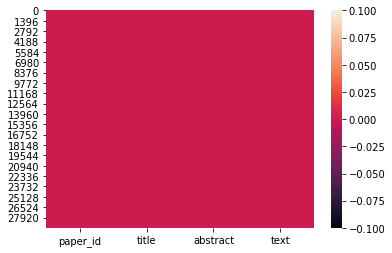

In [28]:
sns.heatmap(corona_df.isnull()); ## procurando dados faltantes pelo mapa de calor

In [29]:
len(corona_df[corona_df['paper_id'] == '']) # procurando por espaços vazios

0

In [30]:
len(corona_df[corona_df['title'] == '']) # procurando por espaços vazios nos tíítulos

3583

In [31]:
len(corona_df[corona_df['abstract'] == '']) # procurando por espaços vazios nos abstracts

8051

In [32]:
len(corona_df[corona_df['text'] == '']) # procurando por espaços vazios nos textos

0

In [33]:
#corona_df = corona_df2  ## reafzendo tudo porra!!

In [34]:
corona_df = corona_df[corona_df['title'] != ''] ## apagando os artigos sem tíítulos

In [35]:
corona_df = corona_df[corona_df['abstract'] != ''] ## apagando os artigos sem abstract

In [36]:
corona_df.shape ## o que sobrou após a limpeza??

(20343, 4)

**REMOVENDO ARTIGOS DUPLICADOS**

In [37]:
corona_df.drop_duplicates(['abstract', 'text', 'title'], inplace=True)

In [38]:
corona_df.shape  ## vendo quem mandou 2 ou mais vezes o mesmo artigo - ahaha

(20211, 4)

**BASE DE DADOS DE AMOSTRA**


In [77]:
corona_df = corona_df.sample(n = 500, random_state=1)

In [78]:
corona_df.shape

(500, 4)

In [ ]:
corona_df.head()

In [ ]:
corona_df.tail()

In [ ]:
## Visual Text analisys
sample_text = corona_df['text'][12341]
sample_text

In [ ]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.5/en_core_sci_md-0.2.5.tar.gz

In [45]:
#!pip uninstall en_core_web_md
#!pip uninstall en_core_sci_sm
#!pip uninstall en_core_sci_md
#!python -m spacy download en_core_web_md
#!python -m spacy download en_core_sci_md
#!python -m spacy link en_core_web_md en --force
!python -m spacy link en_core_sci_md en --force

✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_sci_md -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


**FUNÇÃO PARA PREPROCESSAMENTO**


In [60]:
##ESABILITANDO 'PARSER' -> DA ANÁLISE DE PALAVRAS; RECONHECIMENTO DE ENITADADES -> 'NER'
#!python -m download en_core_sci_md
import spacy, scispacy
nlp = spacy.load('en')
#!spacy download en_core_sci_md

nlp = spacy.load('en_core_sci_md')
nlp = en_core_sci_md.load(disable=['tagger', 'parser', 'ner'])

nlp.max_length = 2000000

In [61]:
print(spacy.lang.en.stop_words.STOP_WORDS)

{'somewhere', 'these', 'although', 'would', 'since', "'ll", 'whenever', 'though', 'few', 'under', 'full', 'too', '‘m', 'below', 'before', 'anyhow', 'beside', 'among', 'do', 'more', 'because', 'have', 'unless', 'hereupon', 'whither', '‘ve', 'yourself', 'such', 'done', 'fifty', 'seemed', 'be', 'least', 'besides', 'less', 'thereupon', 'nor', 'indeed', 'all', 'nowhere', 'together', 'us', 'well', 'your', 'thus', 'could', 'anyway', 'may', 'after', 'however', 'beforehand', 'part', 'thereby', 'to', 'various', 'n‘t', 'out', 'otherwise', 'along', 'down', 'elsewhere', 'moreover', 'nine', 'upon', 'someone', 'whereafter', 'were', 'never', 'whereupon', 'himself', 'with', 'hereafter', 'other', 'the', 'sixty', 'does', 'who', 'everyone', 'whatever', 'forty', 'bottom', 'own', 'serious', 'others', 'another', 'used', 'he', 'really', 'also', 'first', 'four', 'mostly', 'will', 'becomes', 'each', 'keep', 'further', '’d', 'next', 'mine', 'how', 'and', 'into', 'often', 'there', 'sometime', 'hence', 'must', 'he

In [ ]:
sample_text

In [67]:

def spacy_tokenizer(sentence):
  sentence = sentence.lower() ## coloca tudo em minúsculo
  list = []   ## nlp(sentence)
  list = [word.lemma for word in nlp(sentence) if (word.is_stop or
                                              word.like_num or
                                              word.is_punct or
                                              word.is_space)]
  list = ' '.join([str(element) for element in list])
  return list

In [ ]:
teste = sample_text
result = spacy_tokenizer(teste)
result

In [82]:
corona_df['text'] = corona_df['text'].apply(spacy_tokenizer)

In [ ]:
print(sample_text)

In [74]:
len(sample_text)

51683

In [ ]:
print(corona_df['text'][11015])